<h1>Classificar bayesiano com função densidade de probabilidade 
(verossimilhança) obtida com base em modelos de misturas de gaussianas.</h1>

<h2>Importação das Bibliotecas</h2>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.datasets import load_iris, load_breast_cancer
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis as QDA
from ucimlrepo import fetch_ucirepo
from sklearn.metrics import accuracy_score, confusion_matrix
from matplotlib.colors import ListedColormap
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer 

<h2>Criação do Dataset Artificial</h2>

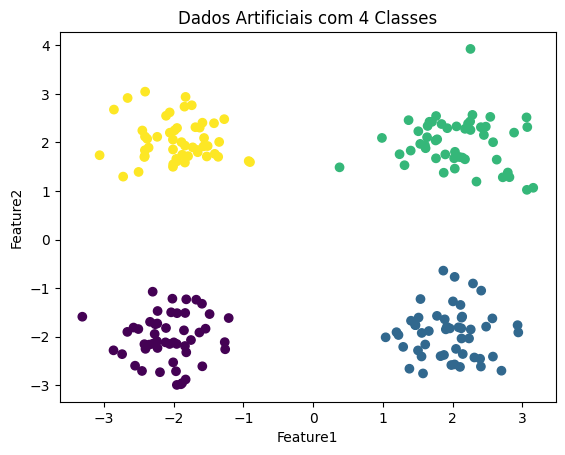

[[-1.75164292 -2.06913215]
 [-1.67615573 -1.23848507]
 [-2.11707669 -2.11706848]
 [-1.21039359 -1.61628264]
 [-2.23473719 -1.72871998]
 [-2.23170885 -2.23286488]
 [-1.87901886 -2.95664012]
 [-2.86245892 -2.28114376]
 [-2.50641556 -1.84287633]
 [-2.45401204 -2.70615185]
 [-1.26717562 -2.11288815]
 [-1.9662359  -2.71237409]
 [-2.27219136 -1.94453871]
 [-2.57549679 -1.81215099]
 [-2.30031934 -2.14584687]
 [-2.30085331 -1.07386091]
 [-2.00674861 -2.52885546]
 [-1.58872754 -2.61042182]
 [-1.8955682  -2.97983506]
 [-2.66409302 -1.90156938]
 [-1.63076671 -1.91431586]
 [-2.05782414 -2.15055185]
 [-2.739261   -2.3599221 ]
 [-2.23031939 -1.47143889]
 [-1.82819086 -2.88152008]
 [-1.83795802 -2.19254114]
 [-2.338461   -1.69416186]
 [-1.48450024 -1.53435994]
 [-2.41960876 -2.15460619]
 [-1.83436828 -1.51222744]
 [-2.23958712 -2.09282949]
 [-2.55316749 -2.59810331]
 [-1.59373709 -1.32187999]
 [-2.03600506 -1.49823355]
 [-1.81918199 -2.32255988]
 [-1.8193022  -1.23098172]
 [-2.01791302 -1.21767817]
 

In [2]:

np.random.seed(42)

# Definindo os parâmetros para as classes artificiais
# Classe 0: localizada abaixo e à esquerda
class_0 = np.random.normal(loc=(-2, -2), scale=0.5, size=(50, 2))

# Classe 1: localizada à direita e acima da linha, mas abaixo
class_1 = np.random.normal(loc=(2, -2), scale=0.5, size=(50, 2))

# Classe 2: localizada à direita e acima
class_2 = np.random.normal(loc=(2, 2), scale=0.5, size=(50, 2))

# Classe 3: localizada à esquerda e acima
class_3 = np.random.normal(loc=(-2, 2), scale=0.5, size=(50, 2))

# Combinando as classes
X_artificial = np.vstack((class_0, class_1, class_2, class_3))
y_artificial = np.array([0]*50 + [1]*50 + [2]*50 + [3]*50)

# Criando um DataFrame para os dados artificiais
artificial_data = pd.DataFrame(X_artificial, columns=['Feature1', 'Feature2'])
artificial_data['label'] = y_artificial

# Salvando os dados artificiais em um arquivo CSV
artificial_data.to_csv('dados_artificiais_classes.csv', index=False)

# Plot dos dados artificiais com as classes
plt.scatter(X_artificial[:, 0], X_artificial[:, 1], c=y_artificial, cmap='viridis')
plt.title("Dados Artificiais com 4 Classes")
plt.xlabel("Feature1")
plt.ylabel("Feature2")
plt.show()
# Empilhando as classes
data = np.vstack((class_0, class_1, class_2, class_3))

# Convertendo para array NumPy (se já não estiver)
data_array = np.array(data)
print(data)


<h2>Importação dos Datasets: Irís, Vertebral Column, Breast Cancer e  Dermatology.</h2>

In [3]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
iris = fetch_ucirepo(id=53) 
  
# data (as pandas dataframes) 
X = iris.data.features 
y = iris.data.targets 
  
# metadata 
print(iris.metadata) 
  
# variable information 
print(iris.variables) 


{'uci_id': 53, 'name': 'Iris', 'repository_url': 'https://archive.ics.uci.edu/dataset/53/iris', 'data_url': 'https://archive.ics.uci.edu/static/public/53/data.csv', 'abstract': 'A small classic dataset from Fisher, 1936. One of the earliest known datasets used for evaluating classification methods.\n', 'area': 'Biology', 'tasks': ['Classification'], 'characteristics': ['Tabular'], 'num_instances': 150, 'num_features': 4, 'feature_types': ['Real'], 'demographics': [], 'target_col': ['class'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 1936, 'last_updated': 'Tue Sep 12 2023', 'dataset_doi': '10.24432/C56C76', 'creators': ['R. A. Fisher'], 'intro_paper': {'title': 'The Iris data set: In search of the source of virginica', 'authors': 'A. Unwin, K. Kleinman', 'published_in': 'Significance, 2021', 'year': 2021, 'url': 'https://www.semanticscholar.org/paper/4599862ea877863669a6a8e63a3c707a787d5d7e', 'doi': '1740-9713.01589'}, 'add

In [4]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
vertebral_column = fetch_ucirepo(id=212) 
  
# data (as pandas dataframes) 
X = vertebral_column.data.features 
y = vertebral_column.data.targets 
  
# metadata 
print(vertebral_column.metadata) 
  
# variable information 
print(vertebral_column.variables) 


{'uci_id': 212, 'name': 'Vertebral Column', 'repository_url': 'https://archive.ics.uci.edu/dataset/212/vertebral+column', 'data_url': 'https://archive.ics.uci.edu/static/public/212/data.csv', 'abstract': 'Data set containing values for six biomechanical features used to classify orthopaedic patients into 3 classes (normal, disk hernia or spondilolysthesis) or 2 classes (normal or abnormal).', 'area': 'Health and Medicine', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 310, 'num_features': 6, 'feature_types': ['Real'], 'demographics': [], 'target_col': ['class'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2005, 'last_updated': 'Fri Mar 29 2024', 'dataset_doi': '10.24432/C5K89B', 'creators': ['Guilherme Barreto', 'Ajalmar Neto'], 'intro_paper': None, 'additional_info': {'summary': "Biomedical data set built by Dr. Henrique da Mota during a medical residence period in the Group of Applied R

In [5]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
breast_cancer = fetch_ucirepo(id=14) 
  
# data (as pandas dataframes) 
X = breast_cancer.data.features 
y = breast_cancer.data.targets 
  
# metadata 
print(breast_cancer.metadata) 
  
# variable information 
print(breast_cancer.variables) 


{'uci_id': 14, 'name': 'Breast Cancer', 'repository_url': 'https://archive.ics.uci.edu/dataset/14/breast+cancer', 'data_url': 'https://archive.ics.uci.edu/static/public/14/data.csv', 'abstract': 'This breast cancer domain was obtained from the University Medical Centre, Institute of Oncology, Ljubljana, Yugoslavia. This is one of three domains provided by the Oncology Institute that has repeatedly appeared in the machine learning literature. (See also lymphography and primary-tumor.)', 'area': 'Health and Medicine', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 286, 'num_features': 9, 'feature_types': ['Categorical'], 'demographics': ['Age'], 'target_col': ['Class'], 'index_col': None, 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 1988, 'last_updated': 'Thu Mar 07 2024', 'dataset_doi': '10.24432/C51P4M', 'creators': ['Matjaz Zwitter', 'Milan Soklic'], 'intro_paper': None, 'additional_info': {'summary': 'Thi

In [6]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
dermatology = fetch_ucirepo(id=33) 
  
# data (as pandas dataframes) 
X = dermatology.data.features 
y = dermatology.data.targets 
  
# metadata 
print(dermatology.metadata) 
  
# variable information 
print(dermatology.variables) 


{'uci_id': 33, 'name': 'Dermatology', 'repository_url': 'https://archive.ics.uci.edu/dataset/33/dermatology', 'data_url': 'https://archive.ics.uci.edu/static/public/33/data.csv', 'abstract': 'Aim for this dataset is to determine the type of Eryhemato-Squamous Disease.', 'area': 'Health and Medicine', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 366, 'num_features': 34, 'feature_types': ['Categorical', 'Integer'], 'demographics': ['Age'], 'target_col': ['class'], 'index_col': None, 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 1998, 'last_updated': 'Wed Feb 14 2024', 'dataset_doi': '10.24432/C5FK5P', 'creators': ['Nilsel Ilter', 'H. Guvenir'], 'intro_paper': {'title': 'Learning differential diagnosis of erythemato-squamous diseases using voting feature intervals', 'authors': 'H. Altay Güvenir, G. Demiröz, N. Ilter', 'published_in': 'Artif. Intell. Medicine', 'year': 1998, 'url': 'https://www.semanticscholar

<h2>Carregamento em arquivos csv</h2>

In [33]:



df_iris = pd.DataFrame(X_iris, columns=iris.feature_names)
df_iris['label'] = y_iris
df_iris.to_csv('iris_data.csv', index=False)

df_vertebral = pd.DataFrame(X_vertebral, columns=vertebral_column.feature_names)
df_vertebral['label'] = y_vertebral
df_vertebral.to_csv('vertebral_column_data.csv', index=False)

df_breast_cancer = pd.DataFrame(X_breast_cancer, columns=breast_cancer.feature_names)
df_breast_cancer['label'] = y_breast_cancer
df_breast_cancer.to_csv('breast_cancer_data.csv', index=False)

df_dermatology = pd.DataFrame(X_dermatology, columns=dermatology.feature_names)
df_dermatology['label'] = y_dermatology
df_dermatology.to_csv('dermatology_data.csv', index=False)

<h2>Implementação e treino para conjunto de dados artificial</h2>

Accuracy: 1.00 ± 0.01
Confusion Matrix for the last run:
 [[19  0  0  0]
 [ 0 14  0  0]
 [ 0  0 13  0]
 [ 0  0  0 14]]


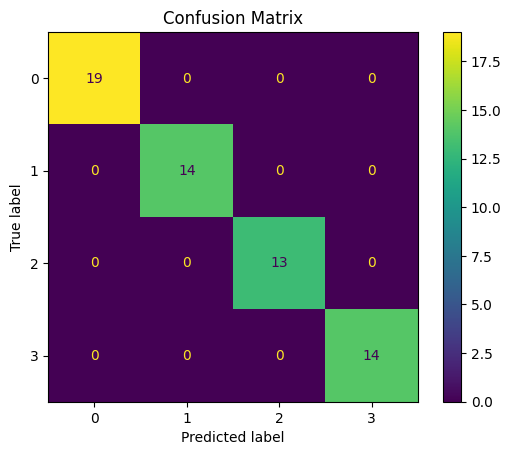

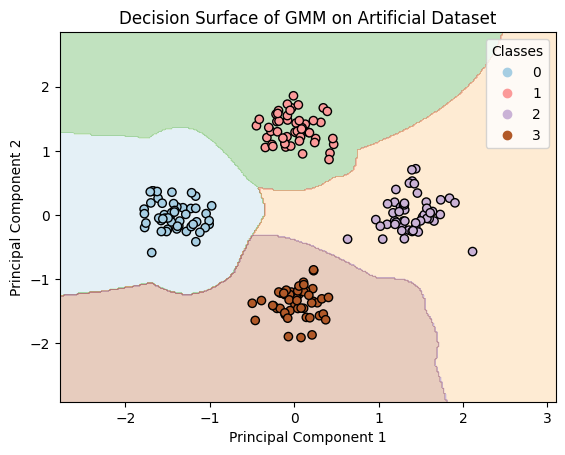

In [8]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.mixture import GaussianMixture
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import pandas as pd

# Dados artificiais gerados
np.random.seed(42)

# Definindo os parâmetros para as classes artificiais
class_0 = np.random.normal(loc=(-2, -2), scale=0.5, size=(50, 2))
class_1 = np.random.normal(loc=(2, -2), scale=0.5, size=(50, 2))
class_2 = np.random.normal(loc=(2, 2), scale=0.5, size=(50, 2))
class_3 = np.random.normal(loc=(-2, 2), scale=0.5, size=(50, 2))

# Combinando as classes
X_artificial = np.vstack((class_0, class_1, class_2, class_3))
y_artificial = np.array([0]*50 + [1]*50 + [2]*50 + [3]*50)

# Padronizar os dados
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_artificial)

# Repetir o experimento 20 vezes
n_runs = 20
accuracies = []
conf_matrices = []

for _ in range(n_runs):
    # Dividir os dados em conjuntos de treino e teste
    X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_artificial, test_size=0.3, random_state=None)

    # Treinar GMM para cada classe
    gmm_models = {}
    for class_label in np.unique(y_train):
        class_samples = X_train[y_train == class_label]
        if class_samples.shape[0] > 3:  # Ajuste o número de componentes conforme necessário
            gmm = GaussianMixture(n_components=3, covariance_type='full', random_state=42)
            gmm.fit(class_samples)
            gmm_models[class_label] = gmm

    # Função para calcular a probabilidade a posteriori usando GMMs
    def classify_gmm(models, X):
        likelihoods = np.array([model.score_samples(X) for model in models.values()]).T
        return np.argmax(likelihoods, axis=1)

    # Fazer previsões no conjunto de teste
    y_pred = classify_gmm(gmm_models, X_test)

    # Converter índices de previsão para rótulos de classe
    class_labels = list(gmm_models.keys())
    y_pred_labels = [class_labels[i] for i in y_pred]

    # Avaliar a precisão
    accuracy = accuracy_score(y_test, y_pred_labels)
    accuracies.append(accuracy)

    # Exibir a matriz de confusão
    conf_matrix = confusion_matrix(y_test, y_pred_labels, labels=class_labels)
    conf_matrices.append(conf_matrix)

# Calcular acurácia média e desvio padrão
mean_accuracy = np.mean(accuracies)
std_accuracy = np.std(accuracies)
print(f'Accuracy: {mean_accuracy:.2f} ± {std_accuracy:.2f}')

# Apresentar a matriz de confusão para a última realização (como exemplo)
print('Confusion Matrix for the last run:\n', conf_matrices[-1])
ConfusionMatrixDisplay(confusion_matrix=conf_matrices[-1], display_labels=np.unique(y_artificial)).plot()
plt.title('Confusion Matrix')
plt.show()

# Plotar a superfície de decisão
def plot_decision_surface(X, y, gmm_models, title):
    pca = PCA(n_components=2)
    X_pca = pca.fit_transform(X)
    x_min, x_max = X_pca[:, 0].min() - 1, X_pca[:, 0].max() + 1
    y_min, y_max = X_pca[:, 1].min() - 1, X_pca[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                         np.arange(y_min, y_max, 0.02))

    Z = classify_gmm(gmm_models, pca.inverse_transform(np.c_[xx.ravel(), yy.ravel()]))
    Z = np.array(Z).reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.Paired)
    
    scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, edgecolor='k', cmap=plt.cm.Paired)

    handles, _ = scatter.legend_elements()
    plt.legend(handles, np.unique(y), title="Classes")
    
    plt.title(title)
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.show()

plot_decision_surface(X_scaled, y_artificial, gmm_models, 'Decision Surface of GMM on Artificial Dataset')


<h2>Implementação e teste para dataset Iris</h2>

In [47]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from ucimlrepo import fetch_ucirepo

# Carregar a base de dados Iris
iris = fetch_ucirepo(id=53)
X = iris.data.features
y = iris.data.targets

# Padronizar os dados
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Dividir os dados em conjuntos de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)


In [48]:

from sklearn.mixture import GaussianMixture
import numpy as np

# Verificar formas
print(f'Forma de X_train: {X_train.shape}')
print(f'Forma de y_train: {y_train.shape}')

Forma de X_train: (105, 4)
Forma de y_train: (105, 1)


<h2>Normalizar dados</h2>

In [50]:

from sklearn.mixture import GaussianMixture
import numpy as np

# Converter y_train para um array NumPy e depois achatar para um vetor unidimensional
y_train_flat = y_train.values.ravel()  # ou use y_train.to_numpy().ravel()

# Verificar formas após a transformação
print(f'Forma de X_train: {X_train.shape}')
print(f'Forma de y_train (após transformação): {y_train_flat.shape}')

# Definir o número de componentes (gaussianas) para cada classe
n_components = 3  # Escolhido arbitrariamente; pode ser ajustado com base na validação

# Treinar um GMM para cada classe
gmm_models = {}
for class_label in np.unique(y_train_flat):  # Usar np.unique para garantir que as classes são extraídas corretamente
    # Selecionar as amostras de X_train que pertencem à classe atual
    class_samples = X_train[y_train_flat == class_label]
    
    # Verificar se há amostras suficientes para treinar o modelo
    if class_samples.shape[0] > n_components:
        gmm = GaussianMixture(n_components=n_components, covariance_type='full', random_state=42)
        gmm.fit(class_samples)
        gmm_models[class_label] = gmm
    else:
        print(f'Não há amostras suficientes na classe {class_label} para treinar o modelo com {n_components} componentes.')


Forma de X_train: (105, 4)
Forma de y_train (após transformação): (105,)


In [51]:

import numpy as np

# Função para calcular a probabilidade a posteriori usando GMMs
def classify_gmm(models, X):
    likelihoods = np.array([model.score_samples(X) for model in models.values()]).T
    return np.argmax(likelihoods, axis=1)

# Fazer previsões no conjunto de teste
y_pred = classify_gmm(gmm_models, X_test)

# Converter índices de previsão para rótulos de classe
class_labels = list(gmm_models.keys())
y_pred_labels = [class_labels[i] for i in y_pred]


C:\Users\jorge\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy: 0.96 ± 0.02
Confusion Matrix for the last run:
 [[13  1  0]
 [ 0 13  4]
 [ 0  0 14]]


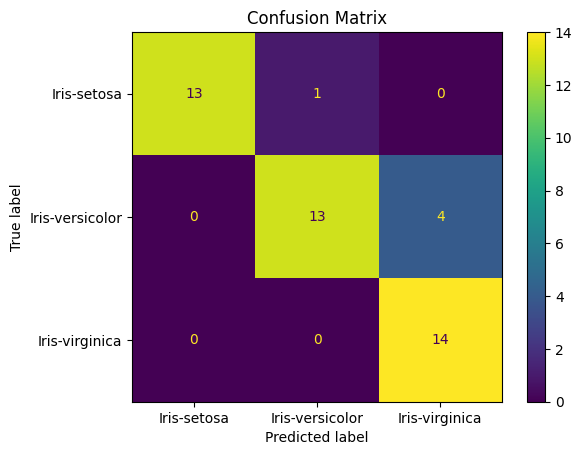

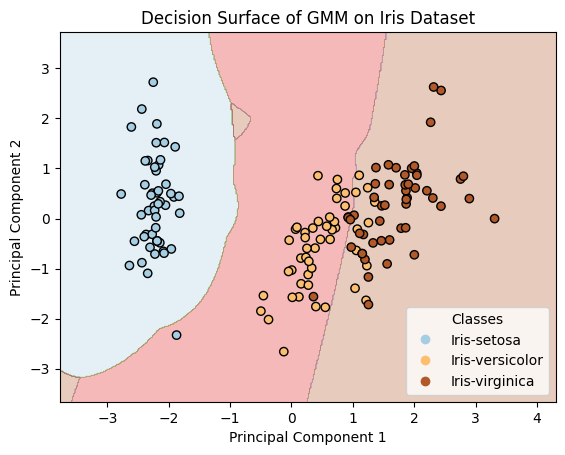

In [52]:
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from ucimlrepo import fetch_ucirepo
from sklearn.mixture import GaussianMixture
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Carregar a base de dados Iris
iris = fetch_ucirepo(id=53)
X = iris.data.features
y = iris.data.targets

# Padronizar os dados
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Converter rótulos de classe para valores numéricos
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Repetir o experimento 20 vezes
n_runs = 20
accuracies = []
conf_matrices = []

for _ in range(n_runs):
    # Dividir os dados em conjuntos de treino e teste
    X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_encoded, test_size=0.3, random_state=None)

    # Treinar GMM para cada classe
    gmm_models = {}
    for class_label in np.unique(y_train):
        # Selecionar amostras da classe atual
        class_samples = X_train[y_train == class_label]
        if class_samples.shape[0] > 3:  # Ajuste o número de componentes conforme necessário
            gmm = GaussianMixture(n_components=3, covariance_type='full', random_state=42)
            gmm.fit(class_samples)
            gmm_models[class_label] = gmm

    # Função para calcular a probabilidade a posteriori usando GMMs
    def classify_gmm(models, X):
        likelihoods = np.array([model.score_samples(X) for model in models.values()]).T
        return np.argmax(likelihoods, axis=1)

    # Fazer previsões no conjunto de teste
    y_pred = classify_gmm(gmm_models, X_test)

    # Converter índices de previsão para rótulos de classe
    class_labels = list(gmm_models.keys())
    y_pred_labels = [class_labels[i] for i in y_pred]

    # Avaliar a precisão
    accuracy = accuracy_score(y_test, y_pred_labels)
    accuracies.append(accuracy)

    # Exibir a matriz de confusão
    conf_matrix = confusion_matrix(y_test, y_pred_labels, labels=class_labels)
    conf_matrices.append(conf_matrix)

# Calcular acurácia média e desvio padrão
mean_accuracy = np.mean(accuracies)
std_accuracy = np.std(accuracies)
print(f'Accuracy: {mean_accuracy:.2f} ± {std_accuracy:.2f}')

# Apresentar a matriz de confusão para a última realização (como exemplo)
print('Confusion Matrix for the last run:\n', conf_matrices[-1])
ConfusionMatrixDisplay(confusion_matrix=conf_matrices[-1], display_labels=label_encoder.classes_).plot()
plt.title('Confusion Matrix')
plt.show()

# Plotar a superfície de decisão
def plot_decision_surface(X, y, gmm_models, title):
    pca = PCA(n_components=2)
    X_pca = pca.fit_transform(X)
    x_min, x_max = X_pca[:, 0].min() - 1, X_pca[:, 0].max() + 1
    y_min, y_max = X_pca[:, 1].min() - 1, X_pca[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                         np.arange(y_min, y_max, 0.02))

    Z = classify_gmm(gmm_models, pca.inverse_transform(np.c_[xx.ravel(), yy.ravel()]))
    Z = np.array(Z).reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.Paired)
    
    # Usar y_encoded em vez de y para o argumento 'c'
    scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, edgecolor='k', cmap=plt.cm.Paired)

    # Adicionar legenda com os rótulos
    handles, _ = scatter.legend_elements()
    plt.legend(handles, label_encoder.classes_, title="Classes")
    
    plt.title(title)
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.show()

plot_decision_surface(X_scaled, y_encoded, gmm_models, 'Decision Surface of GMM on Iris Dataset')


<h2>Implementação para dataset Coluna Vertebral</h2>

C:\Users\jorge\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Classification Report:
                    precision    recall  f1-score   support

           Hernia       0.00      0.00      0.00        12
           Normal       0.59      0.89      0.71        18
Spondylolisthesis       0.90      0.56      0.69        32

         accuracy                           0.55        62
        macro avg       0.50      0.48      0.47        62
     weighted avg       0.64      0.55      0.56        62



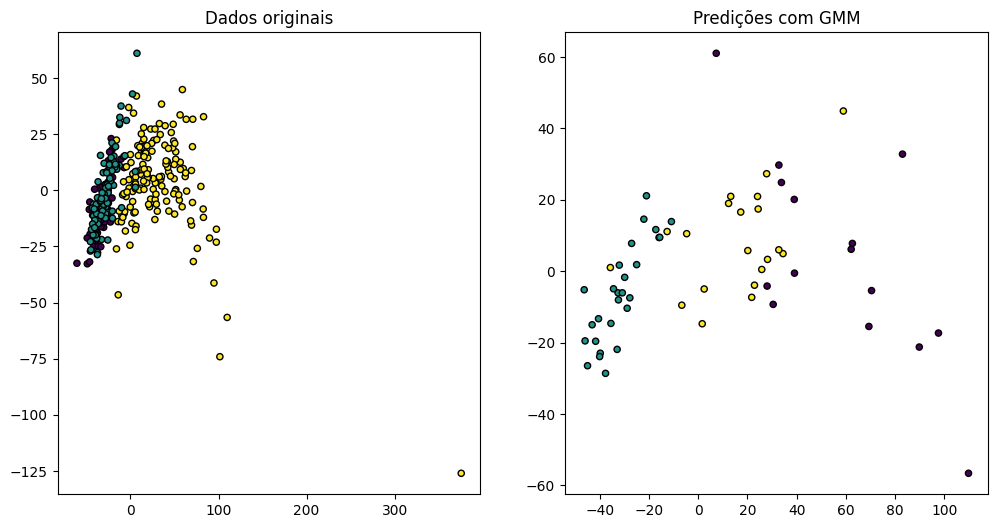

In [43]:
import numpy as np
import pandas as pd
from ucimlrepo import fetch_ucirepo
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Carregar o dataset
vertebral_column = fetch_ucirepo(id=212)

# Dados
X = vertebral_column.data.features
y = vertebral_column.data.targets

# Transformar rótulos para números
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Dividir o dataset em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Treinar o modelo Gaussian Mixture Model (GMM)
gmm = GaussianMixture(n_components=len(np.unique(y_encoded)), covariance_type='full', random_state=42)
gmm.fit(X_train)

# Predições no conjunto de teste
y_pred = gmm.predict(X_test)

# Avaliação
print("Classification Report:\n", classification_report(y_test, y_pred, target_names=label_encoder.classes_))

# Redução de dimensionalidade para visualização (opcional)
pca = PCA(n_components=2)
X_reduced = pca.fit_transform(X)
X_train_reduced = pca.transform(X_train)
X_test_reduced = pca.transform(X_test)

# Plotar os dados reduzidos
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y_encoded, cmap='viridis', edgecolor='k', s=20)
plt.title('Dados originais')

plt.subplot(1, 2, 2)
plt.scatter(X_test_reduced[:, 0], X_test_reduced[:, 1], c=y_pred, cmap='viridis', edgecolor='k', s=20)
plt.title('Predições com GMM')

plt.show()


<h2>Implementação para dados dermatologico</H2>

C:\Users\jorge\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy (GaussianNB): 0.87
Confusion Matrix:
 [[40  0  0  0  0  0]
 [ 0  3  0 11  2  0]
 [ 0  0 19  0  0  0]
 [ 0  0  0 15  0  0]
 [ 0  1  0  0 15  0]
 [ 0  0  0  0  0  4]]
Accuracy with Rejection (GaussianNB): 0.87
Accuracy (GMM): 0.01
Confusion Matrix for GMM:
 [[ 0  0  0  0  0  0  0]
 [ 1  0 39  0  0  0  0]
 [15  0  1  0  0  0  0]
 [ 0 19  0  0  0  0  0]
 [15  0  0  0  0  0  0]
 [16  0  0  0  0  0  0]
 [ 4  0  0  0  0  0  0]]


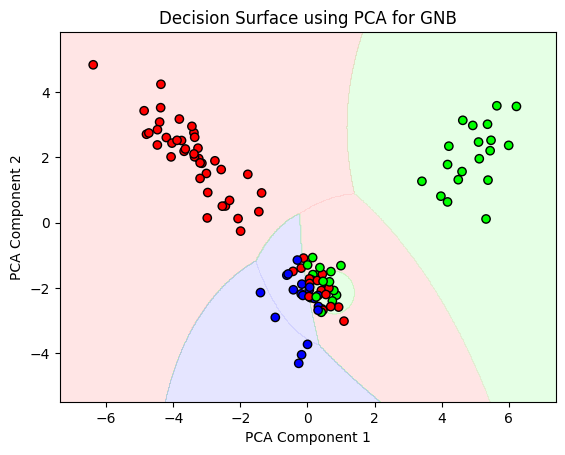

In [46]:
from ucimlrepo import fetch_ucirepo
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix
import numpy as np

import matplotlib.pyplot as plt
from sklearn.decomposition import PCA


from sklearn.impute import SimpleImputer
from matplotlib.colors import ListedColormap

# Carregar e preparar dados
from ucimlrepo import fetch_ucirepo
# fetch dataset
dermatology = fetch_ucirepo(id=33)

# data (as pandas dataframes)
X = dermatology.data.features
y = dermatology.data.targets

# metadata
#print(dermatology.metadata)

# variable information
#print(dermatology.variables)


# Imputar valores faltantes e normalizar os dados
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_imputed)

# Dividir o dataset em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)


# Treinamento do classificador Bayesiano Gaussiano
gnb = GaussianNB()
gnb.fit(X_train, y_train)

# Previsões
y_pred = gnb.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy (GaussianNB): {accuracy:.2f}')

# Matriz de confusão
conf_matrix = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:\n', conf_matrix)

# Opção de Rejeição
def predict_with_rejection(model, X, threshold=0.5):
    probs = model.predict_proba(X)
    max_prob = np.max(probs, axis=1)
    predictions = model.predict(X)
    return np.where(max_prob >= threshold, predictions, -1)

# Predições com rejeição
y_pred_rejection = predict_with_rejection(gnb, X_test, threshold=0.8)
accuracy_rejection = accuracy_score(y_test, y_pred_rejection[y_pred_rejection != -1])
print(f'Accuracy with Rejection (GaussianNB): {accuracy_rejection:.2f}')



# Treinamento do classificador GMM
gmm = GaussianMixture(n_components=3, random_state=42)
gmm.fit(X_train)

# Previsões usando o modelo GMM
y_pred_gmm = gmm.predict(X_test)
accuracy_gmm = accuracy_score(y_test, y_pred_gmm)
print(f'Accuracy (GMM): {accuracy_gmm:.2f}')

# Matriz de confusão
conf_matrix_gmm = confusion_matrix(y_test, y_pred_gmm)
print('Confusion Matrix for GMM:\n', conf_matrix_gmm)


# Fetch dataset
dermatology = fetch_ucirepo(id=33)
X = dermatology.data.features
y = dermatology.data.targets.values.ravel()  # Converter para vetor 1D

# Pré-processamento dos dados
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_imputed)

# Dividir o dataset em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Treinamento do classificador Bayesiano Gaussiano
gnb = GaussianNB()
gnb.fit(X_train, y_train)

# Reduzir a dimensionalidade para 2D usando PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

# Treinar o classificador novamente com os dados reduzidos
gnb_pca = GaussianNB()
gnb_pca.fit(X_train_pca, y_train)

# Visualizar a superfície de decisão
xx, yy = np.meshgrid(np.linspace(X_pca[:, 0].min() - 1, X_pca[:, 0].max() + 1, 500),
                     np.linspace(X_pca[:, 1].min() - 1, X_pca[:, 1].max() + 1, 500))
Z = gnb_pca.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.3, cmap=ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF']))
plt.scatter(X_test_pca[:, 0], X_test_pca[:, 1], c=y_test, edgecolor='k', marker='o', cmap=ListedColormap(['#FF0000', '#00FF00', '#0000FF']))
plt.title('Decision Surface using PCA for GNB')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()


<h2>Implementação e teste para dataset de cancer de pele</h2>

Accuracy: 0.67 ± 0.09
Confusion Matrix for the last run:
 [[48 10]
 [20  8]]


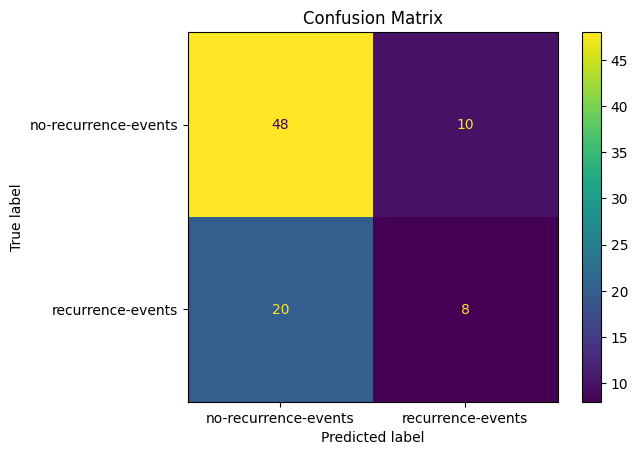

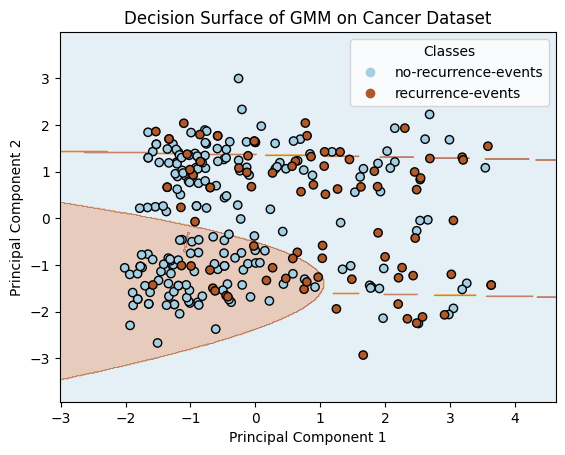

In [24]:
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.mixture import GaussianMixture
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Carregar o dataset de câncer de mama
data = pd.read_csv('breast_cancer_data.csv')  

# Processar variáveis categóricas
categorical_columns = ['age', 'menopause', 'tumor-size', 'inv-nodes', 'node-caps', 'breast', 'breast-quad', 'irradiat']
encoder = LabelEncoder()

for col in categorical_columns:
    data[col] = encoder.fit_transform(data[col])

# Separar características e alvo
X = data.drop(columns=['label'])
y = data['label']

# Padronizar os dados
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Converter rótulos de classe para valores numéricos
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Repetir o experimento 20 vezes
n_runs = 20
accuracies = []
conf_matrices = []

for _ in range(n_runs):
    # Dividir os dados em conjuntos de treino e teste
    X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_encoded, test_size=0.3, random_state=None)

    # Treinar GMM para cada classe
    gmm_models = {}
    for class_label in np.unique(y_train):
        # Selecionar amostras da classe atual
        class_samples = X_train[y_train == class_label]
        if class_samples.shape[0] > 3:  # Ajuste o número de componentes conforme necessário
            gmm = GaussianMixture(n_components=3, covariance_type='full', random_state=42)
            gmm.fit(class_samples)
            gmm_models[class_label] = gmm

    # Função para calcular a probabilidade a posteriori usando GMMs
    def classify_gmm(models, X):
        likelihoods = np.array([model.score_samples(X) for model in models.values()]).T
        return np.argmax(likelihoods, axis=1)

    # Fazer previsões no conjunto de teste
    y_pred = classify_gmm(gmm_models, X_test)

    # Converter índices de previsão para rótulos de classe
    class_labels = list(gmm_models.keys())
    y_pred_labels = [class_labels[i] for i in y_pred]

    # Avaliar a precisão
    accuracy = accuracy_score(y_test, y_pred_labels)
    accuracies.append(accuracy)

    # Exibir a matriz de confusão
    conf_matrix = confusion_matrix(y_test, y_pred_labels, labels=class_labels)
    conf_matrices.append(conf_matrix)

# Calcular acurácia média e desvio padrão
mean_accuracy = np.mean(accuracies)
std_accuracy = np.std(accuracies)
print(f'Accuracy: {mean_accuracy:.2f} ± {std_accuracy:.2f}')

# Apresentar a matriz de confusão para a última realização (como exemplo)
print('Confusion Matrix for the last run:\n', conf_matrices[-1])
ConfusionMatrixDisplay(confusion_matrix=conf_matrices[-1], display_labels=label_encoder.classes_).plot()
plt.title('Confusion Matrix')
plt.show()

# Plotar a superfície de decisão
def plot_decision_surface(X, y, gmm_models, title):
    pca = PCA(n_components=2)
    X_pca = pca.fit_transform(X)
    x_min, x_max = X_pca[:, 0].min() - 1, X_pca[:, 0].max() + 1
    y_min, y_max = X_pca[:, 1].min() - 1, X_pca[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                         np.arange(y_min, y_max, 0.02))

    Z = classify_gmm(gmm_models, pca.inverse_transform(np.c_[xx.ravel(), yy.ravel()]))
    Z = np.array(Z).reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.Paired)
    
    # Usar y_encoded em vez de y para o argumento 'c'
    scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, edgecolor='k', cmap=plt.cm.Paired)

    # Adicionar legenda com os rótulos
    handles, _ = scatter.legend_elements()
    plt.legend(handles, label_encoder.classes_, title="Classes")
    
    plt.title(title)
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.show()

plot_decision_surface(X_scaled, y_encoded, gmm_models, 'Decision Surface of GMM on Cancer Dataset')


<h2>Treino e teste do dataset dermatologico com 20 realizações</h2>

Accuracy (GaussianNB): 0.87 ± 0.03
Accuracy (GMM): 0.15 ± 0.17


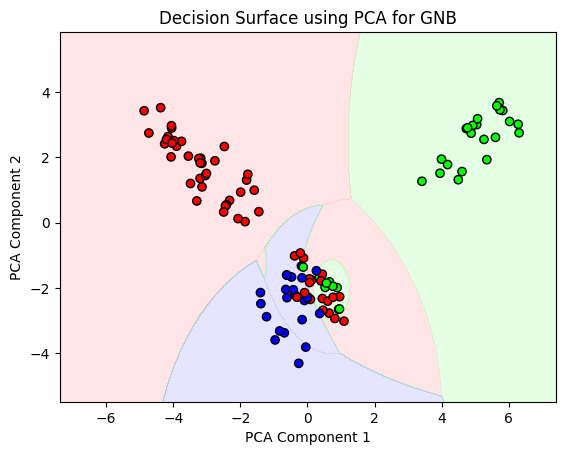

In [31]:
from ucimlrepo import fetch_ucirepo
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.naive_bayes import GaussianNB
from sklearn.mixture import GaussianMixture
from sklearn.metrics import accuracy_score, confusion_matrix
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from matplotlib.colors import ListedColormap

# Número de execuções
n_runs = 20

# Variáveis para armazenar os resultados
gnb_accuracies = []
gmm_accuracies = []

# Loop de execuções
for _ in range(n_runs):
    # Carregar e preparar dados
    dermatology = fetch_ucirepo(id=33)
    X = dermatology.data.features
    y = dermatology.data.targets.values.ravel()  # Converter para vetor 1D

    # Pré-processamento dos dados
    imputer = SimpleImputer(strategy='mean')
    X_imputed = imputer.fit_transform(X)

    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X_imputed)

    # Dividir o dataset em treino e teste
    X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3)

    # Treinamento do classificador Bayesiano Gaussiano
    gnb = GaussianNB()
    gnb.fit(X_train, y_train)

    # Previsões
    y_pred_gnb = gnb.predict(X_test)
    accuracy_gnb = accuracy_score(y_test, y_pred_gnb)
    gnb_accuracies.append(accuracy_gnb)

    # Treinamento do classificador GMM
    gmm = GaussianMixture(n_components=3, random_state=42)
    gmm.fit(X_train)

    # Previsões usando o modelo GMM
    y_pred_gmm = gmm.predict(X_test)
    accuracy_gmm = accuracy_score(y_test, y_pred_gmm)
    gmm_accuracies.append(accuracy_gmm)

# Calcular acurácia média e desvio padrão para GaussianNB
mean_accuracy_gnb = np.mean(gnb_accuracies)
std_accuracy_gnb = np.std(gnb_accuracies)
print(f'Accuracy (GaussianNB): {mean_accuracy_gnb:.2f} ± {std_accuracy_gnb:.2f}')

# Calcular acurácia média e desvio padrão para GMM
mean_accuracy_gmm = np.mean(gmm_accuracies)
std_accuracy_gmm = np.std(gmm_accuracies)
print(f'Accuracy (GMM): {mean_accuracy_gmm:.2f} ± {std_accuracy_gmm:.2f}')

# Reduzir a dimensionalidade para 2D usando PCA e plotar a superfície de decisão para uma das execuções
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

# Treinar o classificador novamente com os dados reduzidos
gnb_pca = GaussianNB()
gnb_pca.fit(X_train_pca, y_train)

# Visualizar a superfície de decisão
xx, yy = np.meshgrid(np.linspace(X_pca[:, 0].min() - 1, X_pca[:, 0].max() + 1, 500),
                     np.linspace(X_pca[:, 1].min() - 1, X_pca[:, 1].max() + 1, 500))
Z = gnb_pca.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.3, cmap=ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF']))
plt.scatter(X_test_pca[:, 0], X_test_pca[:, 1], c=y_test, edgecolor='k', marker='o', cmap=ListedColormap(['#FF0000', '#00FF00', '#0000FF']))
plt.title('Decision Surface using PCA for GNB')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()
